In [9]:
# 패키지 로딩하기(Package Loading)
import pandas            as pd
import matplotlib.pyplot as plt

In [5]:
# 데이터 읽어오기 : xlsx
file_path  = 'D:/KMA/diamonds.xlsx'
sheet_name = "data"
diamonds   = pd.read_excel(io         = file_path, 
                           sheet_name = sheet_name, # sheet_name = 0
                           header     = 0)
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [6]:
# 데이터의 정보 보기
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
# 데이터의 종류
# (1) 범주형 데이터(Categorical Data) : 문자, 숫자(숫자의 의미가 없음)
# (2) 수치형 데이터(Numerical Data)   : 숫자(숫자의 의미가 있음)

### <center> <b> 1. 범주형 데이터 분석 : 1개의 열 </b> </center>
- 표 = 빈도표   : 빈도, 백분율
- 데이터 시각화 : 막대그래프, 원그래프(X) 

In [8]:
# (1) 표 = 빈도표(Frequency Table)
# 빈도(Frequency)
# 백분율(Percent) : 0 ~ 100 사이의 값

cut_counts      = diamonds['cut'].value_counts()
cut_percentages = diamonds['cut'].value_counts(normalize = True) * 100

print("\n'cut' 열의 빈도:")
print(cut_counts)
print("\n'cut' 열의 백분율:")
print(cut_percentages)


'cut' 열의 빈도:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

'cut' 열의 백분율:
cut
Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: proportion, dtype: float64


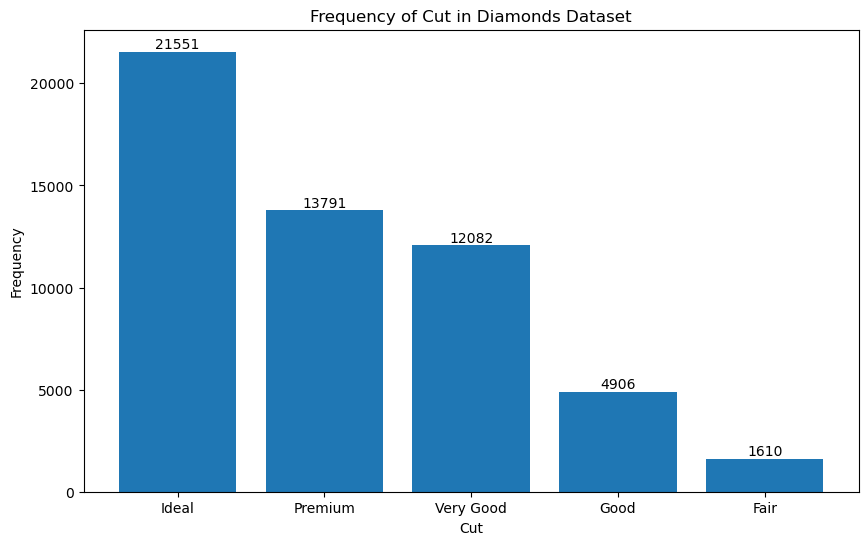

In [12]:
# (2) 데이터 시각화(Data Visualization) : 막대그래프(Bar Chart)
plt.figure(figsize = (10, 6))
bars = plt.bar(cut_counts.index, cut_counts.values)
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.title('Frequency of Cut in Diamonds Dataset')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             str(bar.get_height()), 
             ha = 'center', 
             va = 'bottom')
plt.show()

### <center><b>2. 수치형 데이터의 분석 : 1개의 열</b></center>
- 표 = 빈도표 : 구간의 빈도, 백분율
- 데이터 시각화 : 히스토그램, 상자그림, 바이올린
- 기술통계량 = 요약통계량

In [13]:
# (1) 표 = 빈도표 : 구간의 빈도, 백분율
# 구간의 정보를 가지는 새로운 열을 생성하기 : Feature Engineering

# price : 수치형 데이터
# price_group : 범주형 데이터 : 구간의 정보를 가지고 있음

# price                   price_group
# 0     이상 ~  5000 미만  Very Cheap
# 5000  이상 ~ 10000 미만  Cheap
# 10000 이상 ~ 15000 미만  Expensive
# 15000 이상 ~ 20000 미만  Very Expensive

price_bins              = [0, 5000, 10000, 15000, 20000]
price_labels            = ['Very Cheap', 'Cheap', 'Expensive', 'Very Expensive']
diamonds['price_group'] = pd.cut(diamonds['price'], 
                                 bins   = price_bins, 
                                 labels = price_labels, 
                                 right  = False)
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

  price_group  
0  Very Cheap  
1  Very Cheap  
2  Very Cheap  
3  Very Cheap  
4  Very Cheap

In [14]:
price_group_counts      = diamonds['price_group'].value_counts()
price_group_percentages = diamonds['price_group'].value_counts(normalize = True) * 100

# 빈도와 백분율 출력
print("\n'price_group' 열의 빈도:")
print(price_group_counts)
print("\n'price_group' 열의 백분율:")
print(price_group_percentages)


'price_group' 열의 빈도:
price_group
Very Cheap        39213
Cheap              9504
Expensive          3567
Very Expensive     1656
Name: count, dtype: int64

'price_group' 열의 백분율:
price_group
Very Cheap        72.697442
Cheap             17.619577
Expensive          6.612903
Very Expensive     3.070078
Name: proportion, dtype: float64


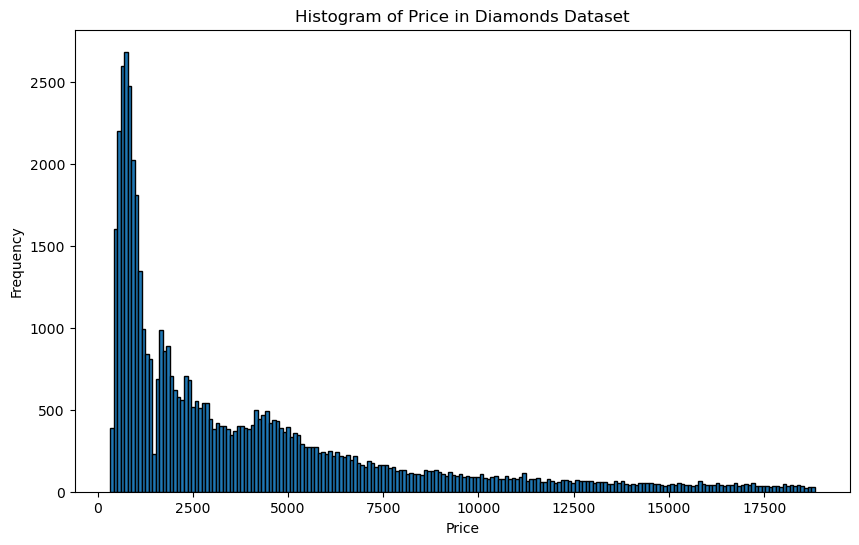

In [16]:
# (2) 데이터 시각화 : 히스토그램(Histogram)
plt.figure(figsize = (10, 6))
plt.hist(diamonds['price'], bins = 200, edgecolor = 'black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price in Diamonds Dataset')
plt.show()

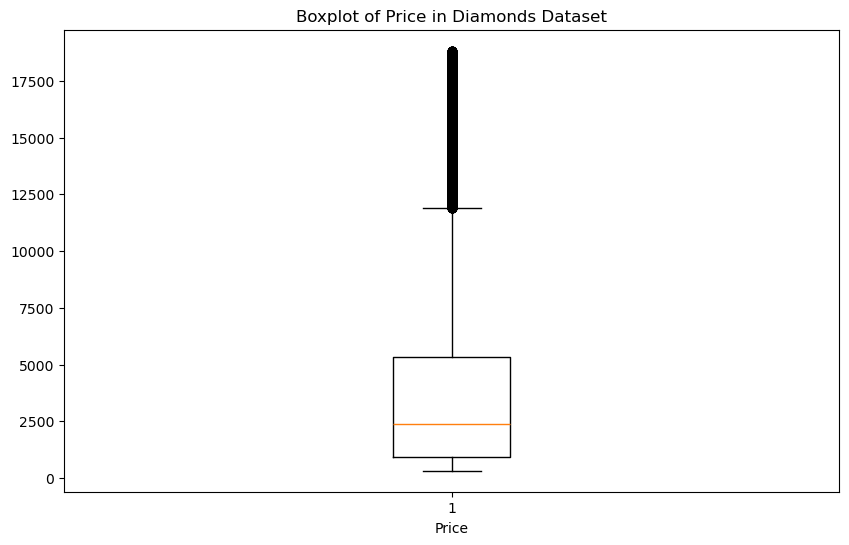

In [17]:
# (2) 데이터 시각화 : 상자그림(Boxplot)
plt.figure(figsize = (10, 6))
plt.boxplot(diamonds['price'])
plt.xlabel('Price')
plt.title('Boxplot of Price in Diamonds Dataset')
plt.show()

In [ ]:
# 참고
# 이상치(Outlier) 유무를 파악

# Q. 입력 오류인가? 센서가 고장이 났나?

# 입력오류나 고장이 아니라면
# (1) 그냥 사용한다.
# (2) 삭제한다.
# (3) 변환한다 : 로그 변환, 루트 변환, 역수 변환 : Box-Cox Transformation
# (4) 대체(imputation)한다 : 평균, 절사평균, 중위수, 최빈수, Hot-Dec, ...